In [1]:
import seaborn as sns
import requests
import zipfile
import io
import polars as pl
from matplotlib import pyplot as plt
from datetime import datetime, timedelta
from funding_crawler.viz import count_plot, perc_comp


def count_plot(df, col):
    lst = [x for xs in df[col] if xs is not None for x in xs]

    series = pl.Series(col, lst)
    counts_df = (
        pl.DataFrame([series])
        .unpivot()
        .group_by("value")
        .len()
        .sort("len", descending=True)
        .rename({"value": col, "len": "count"})
    )

    sns.barplot(data=counts_df, y=col, x="count", order=counts_df[col])
    plt.show()

In [2]:
data_url = "https://foerderdatenbankdump.fra1.cdn.digitaloceanspaces.com/data/data.zip"

In [3]:
response = requests.get(data_url)
response.raise_for_status()

with zipfile.ZipFile(io.BytesIO(response.content)) as z:
    file_name = z.namelist()[0]
    with z.open(file_name) as f:
        df = pl.read_parquet(f)

print(f"{len(df)} Förderprogramme")
print(df.columns)
print(df.dtypes)

2534 Förderprogramme
['id_hash', 'id_url', 'url', 'title', 'description', 'more_info', 'legal_basis', 'contact_info_institution', 'contact_info_street', 'contact_info_city', 'contact_info_fax', 'contact_info_phone', 'contact_info_email', 'contact_info_website', 'funding_type', 'funding_area', 'funding_location', 'eligible_applicants', 'funding_body', 'further_links', 'checksum', 'license_info', 'previous_update_dates', 'last_updated', 'on_website_from', 'deleted']
[String, String, String, String, String, String, String, String, String, String, String, String, String, String, List(String), List(String), List(String), List(String), String, List(String), String, String, List(Datetime(time_unit='us', time_zone=None)), Datetime(time_unit='us', time_zone=None), Datetime(time_unit='us', time_zone=None), Boolean]


In [4]:
current_date = datetime.today()
most_recent_updated = df["last_updated"].max()

print("today is ", current_date)
print("most recent update (updates when crawler ran):", most_recent_updated)

today is  2025-06-11 12:19:36.342961
most recent update (updates when crawler ran): 2025-06-11 02:00:20.516902


In [17]:
df.filter(pl.all_horizontal([pl.col("on_website_from").is_null(), pl.col("deleted") == True]))

id_hash,id_url,url,title,description,more_info,legal_basis,contact_info_institution,contact_info_street,contact_info_city,contact_info_fax,contact_info_phone,contact_info_email,contact_info_website,funding_type,funding_area,funding_location,eligible_applicants,funding_body,further_links,checksum,license_info,previous_update_dates,last_updated,on_website_from,deleted,creation_date,week_start_date
str,str,str,str,str,str,str,str,str,str,str,str,str,str,list[str],list[str],list[str],list[str],str,list[str],str,str,list[datetime[μs]],datetime[μs],datetime[μs],bool,datetime[μs],datetime[μs]
"""cd239bf6a84757d5539407ce987e63…","""bund-lr-innovationsfoerderung-…","""https://www.foerderdatenbank.d…","""Förderung innovativer, agrarna…","""<article class=""content--tab-t…","""<article class=""content--tab-t…","""<article class=""content--tab-t…","""Landwirtschaftliche Rentenbank…","""Theodor-Heuss-Allee 80""","""60486 Frankfurt am Main""","""+49 69 2107-6459 ""","""+49 69 2107-700 ""","""startupfoerderung@rentenbank.d…","""https://www.rentenbank.de/kont…","[""Zuschuss"", ""Darlehen""]","[""Landwirtschaft & Ländliche Entwicklung"", ""Forschung & Innovation (themenoffen)"", ""Existenzgründung & -festigung""]","[""bundesweit""]","[""Unternehmen"", ""Existenzgründer/in""]","""Bundesministerium für Ernährun…","[""https://www.rentenbank.de/innovation/start-up-finanzierung/""]","""041dfeea757ccaa35aa19008bcb9f5…",""" Förderung innovativer, agrarn…","[2025-03-21 02:00:15.240942, 2025-03-29 02:00:15.050196]",2025-03-29 02:00:15.050196,null,true,2025-03-21 02:00:15.240942,2025-03-17 00:00:00
"""97edc5f245304e0ea7c0c0c9ad67de…","""land-bayern-europaeischer-sozi…","""https://www.foerderdatenbank.d…","""Europäischer Sozialfonds (ESF)…","""<article class=""content--tab-t…","""<article class=""content--tab-t…","""<article class=""content--tab-t…","""Bayerisches Staatsministerium …","""Winzererstr. 9""","""80787 München""",null,"""089 126101 ""","""esf@stmas.bayern.de""","""https://www.stmas.bayern.de/""","[""Zuschuss""]","[""Arbeit"", ""Aus- & Weiterbildung"", ""Frauenförderung""]","[""Bayern""]","[""Unternehmen"", ""Bildungseinrichtung"", … ""Öffentliche Einrichtung""]",null,"[""https://www.esf.bayern.de/esf-foerderung/foerderaktion/fp2014-2020"", ""https://www.esf.bayern.de/esf-foerderung/react-eu/""]","""badc50b34d87e5f1eb566aeb85906e…",""" Europäischer Sozialfonds (ESF…",[2025-05-07 02:00:31.394581],2025-05-07 02:00:31.394581,null,true,2025-05-07 02:00:31.394581,2025-05-05 00:00:00
"""2f320d2937877b18b915be8db4b5d1…","""land-hamburg-energiewende-in-u…","""https://www.foerderdatenbank.d…","""Energiewende in Unternehmen – …","""<article class=""content--tab-t…","""<article class=""content--tab-t…","""<article class=""content--tab-t…","""Behörde für Umwelt, Klima, Ene…","""Neuenfelder Straße 19""","""21109 Hamburg""",null,"""040 428403641 ""","""ronald.burchardt@bukea.hamburg…","""https://www.hamburg.de/energie…","[""Zuschuss""]","[""Energieeffizienz & Erneuerbare Energien"", ""Digitalisierung"", ""Umwelt- & Naturschutz""]","[""Hamburg""]","[""Unternehmen""]","""Behörde für Umwelt, Klima, Ene…","[""https://www.hamburg.de/energieflexibel/6161600/flexibel-und-effizient/""]","""d7f33a41ea9869db873e43e2249a38…",""" Energiewende in Unternehmen –…",[2025-05-09 02:00:20.933715],2025-05-09 02:00:20.933715,null,true,2025-05-09 02:00:20.933715,2025-05-05 00:00:00
"""7a6dc50ba7c42300e6702834671529…","""land-bremen-beteiligungsfonds-…","""https://www.foerderdatenbank.d…","""Beteiligungsfonds Bremen""","""<article class=""content--tab-t…","""<article class=""content--tab-t…","""<article class=""content--tab-t…","""BAB Beteiligungs- und Manageme…","""Domshof 14/15""","""28195 Bremen""",null,"""0421 960040 ""","""mail@bab-bremen.de""","""https://www.bab-bremen.de/""","[""Beteiligung"", ""Darlehen""]","[""Forschung & Innovation (themenoffen)"", ""Unternehmensfinanzierung""]","[""Bremen""]","[""Unternehmen""]","""Senatorin für Wirtschaft, Arbe…","[""https://www.bab-b

In [5]:
current_df = df.filter(pl.col("deleted") == False)
print(f"{len(current_df)} aktive Förderprogramme")

2457 aktive Förderprogramme


## Descriptive Statistics

### Funding Area

Multiple areas are possible per program

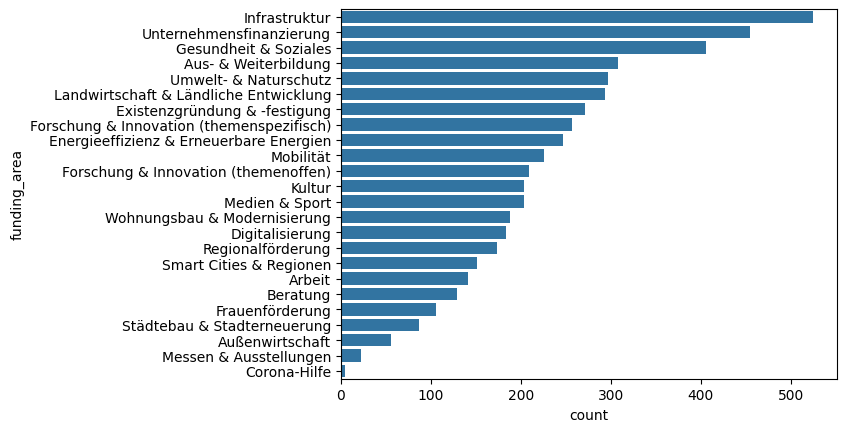

In [6]:
count_plot(df, "funding_area")


### Funding Location

Multiple applicant locations are possible per program.

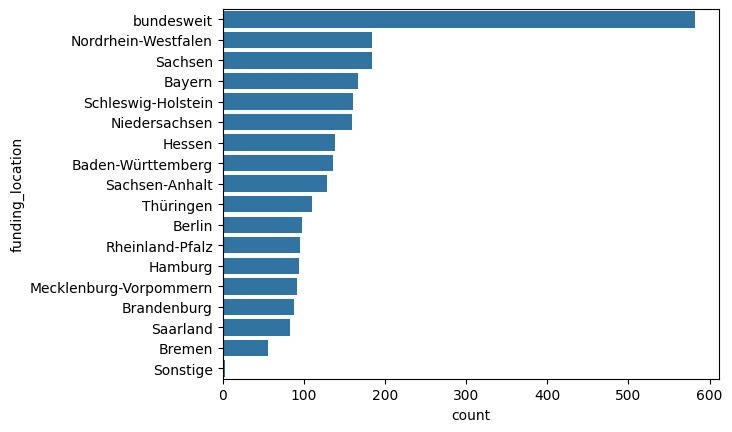

In [7]:
count_plot(df, "funding_location")

### Eligible Applicant Types

Multiple applicant types are possible per program

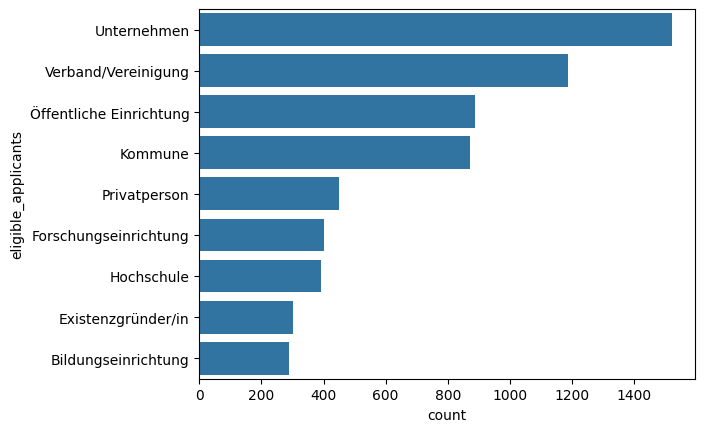

In [8]:
count_plot(df, "eligible_applicants")

### Funding Types
Multiple funding types are possible

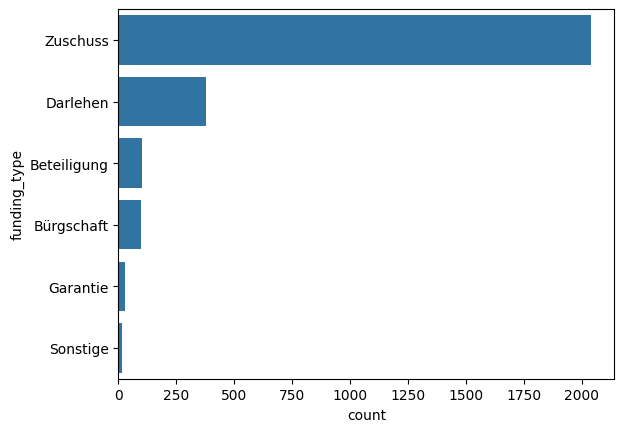

In [9]:
count_plot(df, "funding_type")

## Metadata

### Tracking added and deleted programs

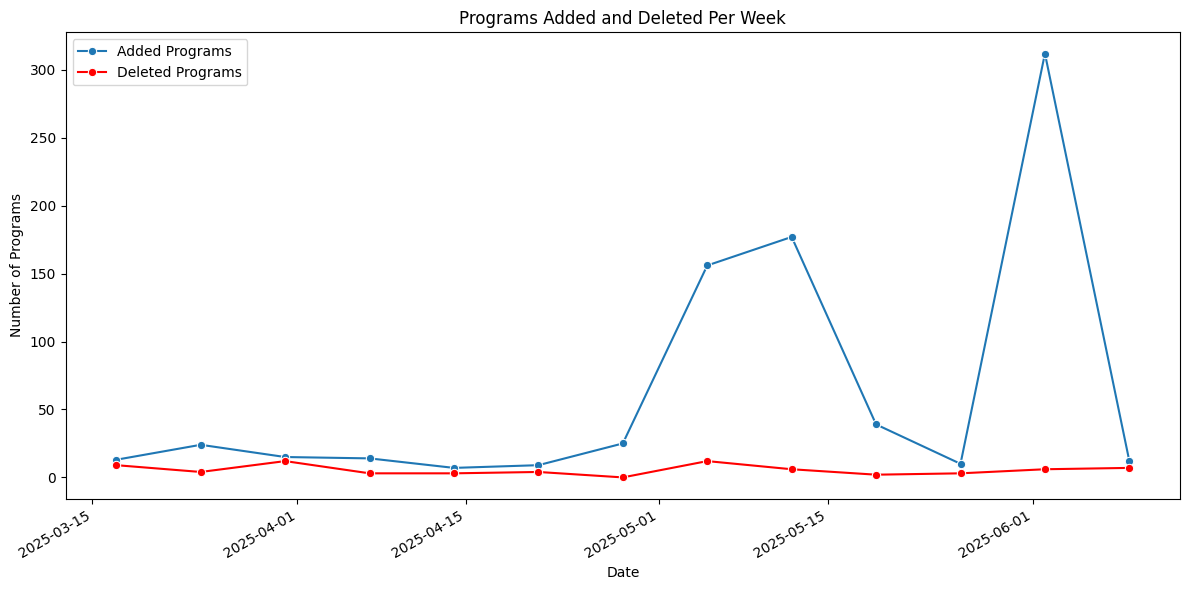

In [10]:
if len(df.filter(df["last_updated"].is_null())) > 0:
    df = df.with_columns(
        pl.when(pl.col("previous_update_dates").is_not_null())
        .then(
            pl.col("previous_update_dates").list.first()
        )  # update dates are in ascending order
        .otherwise(pl.col("last_updated"))
        .alias("creation_date")
    )

    df = df.with_columns(
        [pl.col("creation_date").dt.truncate("1w").alias("week_start_date")]
    )

    # Find the earliest recorded date and filter it out because thats when data was added initially
    earliest_date = df.select(pl.col("creation_date").min()).item()
    df_filtered = df.filter(pl.col("creation_date") != earliest_date)

    weekly_added = (
        df_filtered.filter(~pl.col("deleted"))
        .group_by("week_start_date")
        .len()
        .rename({"len": "added_count"})
        .sort("week_start_date")
    )

    weekly_deleted = (
        df_filtered.filter(pl.col("deleted"))
        .group_by("week_start_date")
        .len()
        .rename({"len": "deleted_count"})
        .sort("week_start_date")
    )

    weekly_counts = weekly_added.join(
        weekly_deleted, on="week_start_date", how="full"
    ).fill_null(0)

    plt.figure(figsize=(12, 6))

    sns.lineplot(
        data=weekly_counts,
        x="week_start_date",
        y="added_count",
        marker="o",
        label="Added Programs",
    )
    sns.lineplot(
        data=weekly_counts,
        x="week_start_date",
        y="deleted_count",
        marker="o",
        label="Deleted Programs",
        color="red",
    )

    plt.title("Programs Added and Deleted Per Week")
    plt.xlabel("Date")
    plt.ylabel("Number of Programs")
    plt.legend()

    plt.gcf().autofmt_xdate()

    plt.tight_layout()
    plt.show()
else:
    print("No update history available yet")


### Type of programs being deleted and added

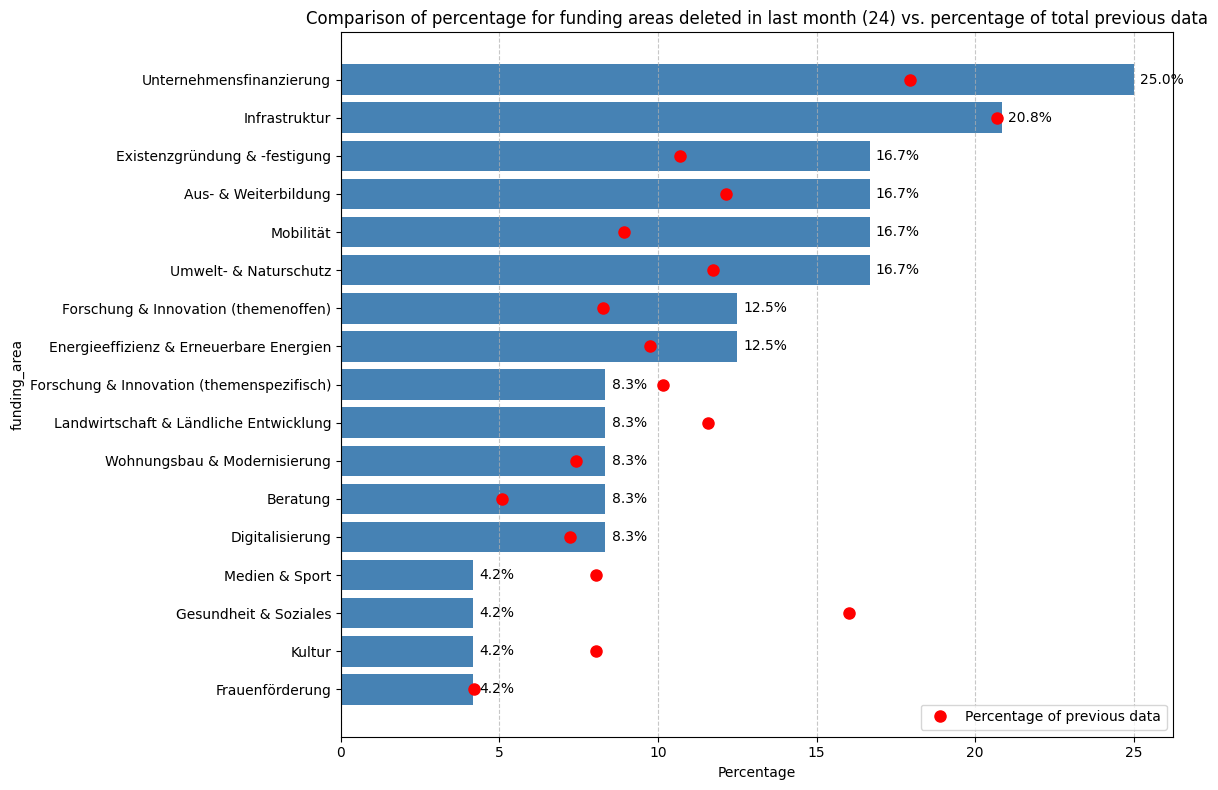

In [11]:
current_date = datetime.now()
one_month_ago = current_date - timedelta(days=30)
recent_del = df.filter(pl.col("creation_date") > one_month_ago).filter(
    pl.col("deleted")
)

perc_comp(
    recent_del,
    df,
    "funding_area",
    f"Comparison of percentage for funding areas deleted in last month ({len(recent_del)}) vs. percentage of total previous data",
)


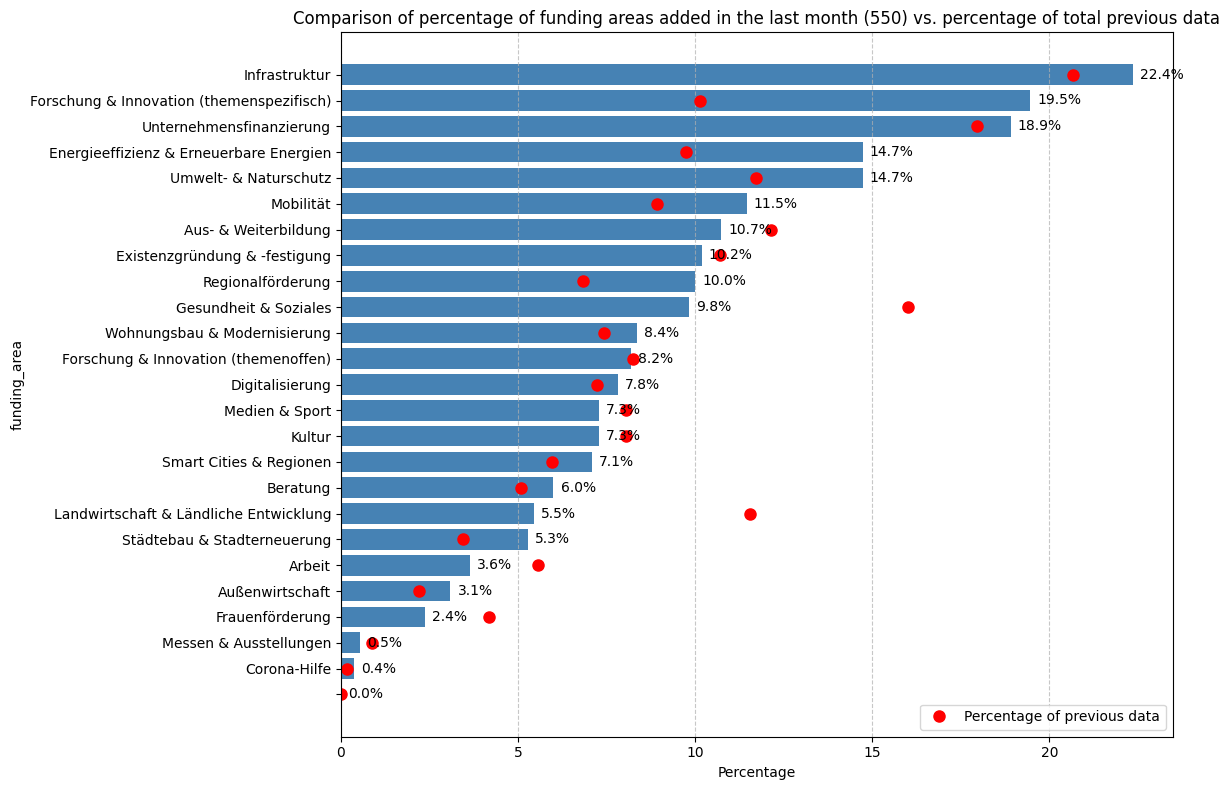

In [12]:
recent_add = df.filter(pl.col("creation_date") > one_month_ago).filter(
    ~pl.col("deleted") 
)

perc_comp(
    recent_add,
    df,
    "funding_area",
    f"Comparison of percentage of funding areas added in the last month ({len(recent_add)}) vs. percentage of total previous data",
)